# Modelagem de transferência de massa em colunas de absorção

Discente: Gabriele de Sousa Araújo

#### Equações matemáticas que modelam a separação de misturas binárias (A+B): </br>

<h4 align="center"> Massa Acumulada = Entra - Sai - Consumida + Gerada </h4>

Onde:
* Massa Acumuada: $$ \frac{dC}{dt}$$

* Entra: $$ cC_{A0}$$

* Sai: $$ cC_{A}$$

* Logo: $$ c = \frac{Q}{\epsilon V}$$
    
---------------------------------------------


$$
\frac{dC}{dt} = cC_{A0} - C_A - [k_1A \cdot C_A - k_2A \cdot q_A]
$$

$$
\frac{dC_B}{dt} = cC_{B0} - C_B - [k_1B \cdot C_B - k_2B \cdot q_B]
$$

$$
\frac{dq_A}{dt} = k_1A \cdot C_A  -  k_2A \cdot q_A
$$

$$
\frac{dq_B}{dt} = k_1B \cdot C_B  -  k_2B \cdot q_B
$$


In [1]:
import numpy as np
import csv
import pandas as pd

# Coluna de Absorção A

In [2]:
d = 0.46 #cm
E = 0.63
L = 20 #cm
Q = 0.25 #ml/min
keqa = 1.2024 
k2a = 3.4980
k1a = keqa * k2a
V = (np.pi*((d**2)/4) * L)
Na = 523
Vs = V/Na  #Va
ci = Q/(E*Vs)
Cii = 0.75
Va = 0.02
ta = (Va/Q)
tn = 0
tmax=80

In [3]:
def f2(x, ca, qa):
    return (k1a*ca) - (k2a*qa)

In [4]:
def f(x, Cii, qa, ca):
    return ci(Cii - ca) - f2(x, ca, qa)

In [5]:
a = 0
h = 0.001  #intervalo (delta) h=(b-a)/100

In [6]:
#domínio
x1 = np.arange(a, tmax, h) #ou t
x2 = len(x1)
x2

80000

In [7]:
#tamanho vetores
ca = np.zeros(x2)
qa = np.zeros(x2)
x = np.zeros(x2)

#valores iniciais
ca[0] = 0
qa[0] = 0

In [8]:
df = []
while tn < tmax:
    if tn < ta:
        ca[0] = 0.75
    else:
        ca[0] = 0.0
   

    if int(tn * 1000) % 320 < 1:
        df.append([tn, ca[Na - 1], ca[0]])
        print(tn, ca[Na - 1], ca[0])
        
    for i in range(0, Na):
        
        x[i + 1] = x[i] + h

        k1_ca =  h * f(x[i], ca[i], ca[i + 1], qa[i + 1])
        k1_qa =  h * f2(x[i], ca[i + 1], qa[i + 1])

        ca[i + 1] = ca[i+1] + k1_ca 
        qa[i + 1] = qa[i+1] + k1_qa
        
#         k2_ca = h * f (x[i] + (h/2), ca[i], ca[i + 1] + (h/2) * k1)
#         k2_qa = f(x[i] + (h/2), y[i] + (h/2) * k1)
        
#         k3 = f(x[i] + h, y[i] + h * k2)
#         k4 = f(x[i] + h, y[i] + h * k3)
            
#         y[i+1] = y[i] + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)
#             x[i+1] = x[i] + h
            

    tn += h
    

0 0.0 0.75
0.32000000000000023 0.0 0.0
0.6400000000000005 1.927106694569181e-283 0.0
0.9600000000000007 1.2320712470516003e-212 0.0
1.2809999999999697 1.016498843821363e-158 0.0
1.6009999999999345 2.460107739251613e-115 0.0
1.9209999999998992 6.132284294369562e-79 0.0
2.240999999999864 1.3617254393799156e-47 0.0
2.560999999999829 4.4940105820670126e-20 0.0
2.8809999999997937 146215.1038783625 0.0
3.2009999999997585 1.780445124851284e+27 0.0
3.5209999999997232 2.153582232836782e+47 0.0
3.840999999999688 5.400561297921352e+65 0.0
4.160999999999724 4.956575860656633e+82 0.0
4.480999999999831 2.6058489595526413e+98 0.0
4.800999999999938 1.1239738009416734e+113 0.0
5.1200000000000445 4.843856634970538e+126 0.0
5.440000000000151 3.22911346559299e+139 0.0
5.760000000000258 3.676186930063395e+151 0.0
6.080000000000365 8.459943018818292e+162 0.0
6.400000000000472 4.539508278210956e+173 0.0
6.720000000000579 6.41458580179678e+183 0.0
7.040000000000686 2.649095558651852e+193 0.0
7.360000000000793

C:\Users\gabim\AppData\Local\Temp\ipykernel_5252\2758699263.py:2: RuntimeWarning: overflow encountered in double_scalars
  return ci*(Cii - ca) - f2(x, ca, qa)
C:\Users\gabim\AppData\Local\Temp\ipykernel_5252\1616134712.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (k1a*ca) - (k2a*qa)


13.44099999999799 nan 0.0
13.760999999997813 nan 0.0
14.080999999997635 nan 0.0
14.400999999997458 nan 0.0
14.72099999999728 nan 0.0
15.040999999997103 nan 0.0
15.360999999996926 nan 0.0
15.680999999996748 nan 0.0
16.000999999996573 nan 0.0
16.320999999996964 nan 0.0
16.640999999997355 nan 0.0
16.960999999997746 nan 0.0
17.280999999998137 nan 0.0
17.60099999999853 nan 0.0
17.92099999999892 nan 0.0
18.24099999999931 nan 0.0
18.5609999999997 nan 0.0
18.88000000000009 nan 0.0
19.200000000000482 nan 0.0
19.520000000000874 nan 0.0
19.840000000001265 nan 0.0
20.160000000001656 nan 0.0
20.480000000002047 nan 0.0
20.800000000002438 nan 0.0
21.12000000000283 nan 0.0
21.44000000000322 nan 0.0
21.76000000000361 nan 0.0
22.080000000004002 nan 0.0
22.400000000004393 nan 0.0
22.720000000004784 nan 0.0
23.040000000005175 nan 0.0
23.360000000005567 nan 0.0
23.680000000005958 nan 0.0
24.00000000000635 nan 0.0
24.32000000000674 nan 0.0
24.64000000000713 nan 0.0
24.960000000007522 nan 0.0
25.280000000007

In [9]:
with open('valores_A.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Time', 'ca_N-1', 'ca_0'])
    writer.writerows(df)

In [10]:
df1=pd.read_csv('valores_A.csv')
df1

,Time,ca_N-1,ca_0
0,0.000,0.000000e+00,0.75
1,0.320,0.000000e+00,0.00
2,0.640,1.927107e-283,0.00
3,0.960,1.232071e-212,0.00
4,1.281,1.016499e-158,0.00
...,...,...,...
245,78.400,NaN,0.00
246,78.720,NaN,0.00
247,79.040,NaN,0.00
248,79.360,NaN,0.00


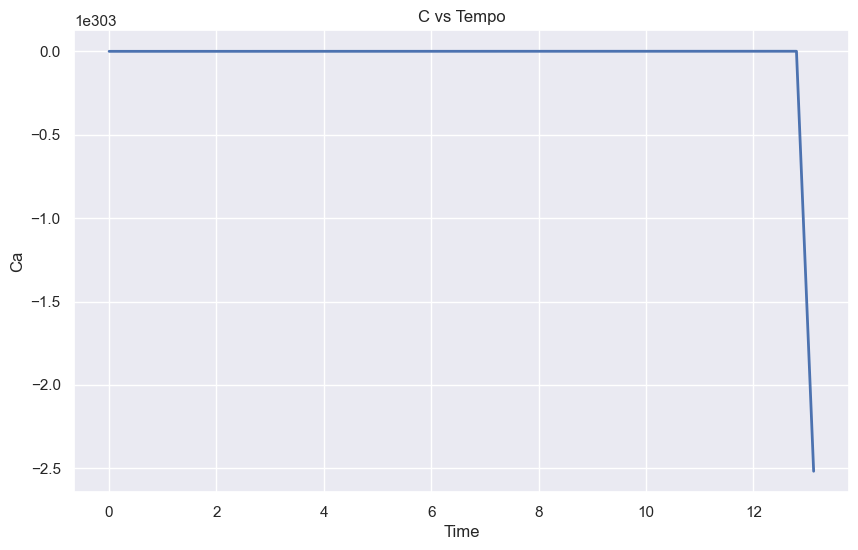

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1, font='sans-serif')



plt.figure(figsize=(10, 6), facecolor="#FFF")
plt.plot(df1['Time'], df1['ca_N-1'], 'b-', linewidth=2)
plt.title('C vs Tempo')
plt.xlabel('Time')
plt.ylabel('Ca')
plt.grid(True)
plt.show()

# 
# 


# Absorção B

In [12]:
d = 0.46 #cm
E = 0.63
L = 20 #cm
Q = 0.25 #ml/min
keqb = 2.72783
k2b = 1.69159
k1b = keqa * k2a
V = (np.pi*((d**2)/4) * L)
Nb = 834
Vs = V/Nb  #Va
ci = Q/(E*Vs)
Cii = 0.75
Va = 0.02
ta = (Va/Q)
tn = 0
tmax=80

In [13]:
def f2(x, cb, qb):
    return (k1b*cb) - (k2b*qb)

In [14]:
def f(x, Cii, qb, cb):
    return ci*(Cii - cb) - f2(x, cb, qb)

In [15]:
#tamanho vetores
cb = np.zeros(x2)
qb = np.zeros(x2)
x = np.zeros(x2)

#valores iniciais
cb[0] = 0
qb[0] = 0

In [16]:
df2 = []
while tn < tmax:
    if tn < ta:
        cb[0] = 0.75
    else:
        cb[0] = 0.0
   

    if int(tn * 1000) % 320 < 1:
        df2.append([tn, cb[Nb - 1], cb[0]])
        print(tn, cb[Nb - 1], cb[0])
        
    for i in range(0, Nb):
        x[i + 1] = x[i] + h

        k1_cb =  h * f(x[i], cb[i], cb[i + 1], qb[i + 1])
        k1_qb =  h * f2(x[i], cb[i + 1], qb[i + 1])

        cb[i + 1] = cb[i+1] + k1_cb
        qb[i + 1] = qb[i+1] + k1_qb

    tn += h

0 0.0 0.75
0.32000000000000023 0.0 0.0
0.6400000000000005 0.0 0.0
0.9600000000000007 4.072665143358538e-299 0.0
1.2809999999999697 3.331317565554518e-221 0.0
1.6009999999999345 1.3792514428098105e-157 0.0
1.9209999999998992 1.1585757537398497e-103 0.0
2.240999999999864 7.321725571318822e-57 0.0
2.560999999999829 1.5748953346808309e-15 0.0
2.8809999999997937 1.561544935435393e+22 0.0
3.2009999999997585 4.5956876543819025e+55 0.0
3.5209999999997232 1.592926948019011e+86 0.0
3.840999999999688 1.856288058656152e+114 0.0
4.160999999999724 1.6463458203169864e+140 0.0
4.480999999999831 2.1261116486973528e+164 0.0
4.800999999999938 6.749838676656252e+186 0.0
5.1200000000000445 6.98295876398013e+207 0.0
5.440000000000151 4.545124944228764e+227 0.0
5.760000000000258 2.143538818564898e+246 0.0
6.080000000000365 9.421653805951123e+263 0.0
6.400000000000472 4.783064394172535e+280 0.0
6.720000000000579 3.371562851636584e+296 0.0


C:\Users\gabim\AppData\Local\Temp\ipykernel_5252\3276892827.py:2: RuntimeWarning: overflow encountered in double_scalars
  return ci*(Cii - cb) - f2(x, cb, qb)
C:\Users\gabim\AppData\Local\Temp\ipykernel_5252\3276892827.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return ci*(Cii - cb) - f2(x, cb, qb)


7.040000000000686 nan 0.0
7.360000000000793 nan 0.0
7.680000000000899 nan 0.0
8.000000000001005 nan 0.0
8.320000000000828 nan 0.0
8.64000000000065 nan 0.0
8.960000000000473 nan 0.0
9.280000000000296 nan 0.0
9.600000000000119 nan 0.0
9.92099999999994 nan 0.0
10.240999999999763 nan 0.0
10.560999999999586 nan 0.0
10.880999999999409 nan 0.0
11.200999999999231 nan 0.0
11.520999999999054 nan 0.0
11.840999999998877 nan 0.0
12.1609999999987 nan 0.0
12.480999999998522 nan 0.0
12.800999999998345 nan 0.0
13.120999999998167 nan 0.0
13.44099999999799 nan 0.0
13.760999999997813 nan 0.0
14.080999999997635 nan 0.0
14.400999999997458 nan 0.0
14.72099999999728 nan 0.0
15.040999999997103 nan 0.0
15.360999999996926 nan 0.0
15.680999999996748 nan 0.0
16.000999999996573 nan 0.0
16.320999999996964 nan 0.0
16.640999999997355 nan 0.0
16.960999999997746 nan 0.0
17.280999999998137 nan 0.0
17.60099999999853 nan 0.0
17.92099999999892 nan 0.0
18.24099999999931 nan 0.0
18.5609999999997 nan 0.0
18.88000000000009 nan 

In [17]:
with open('valores_B.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Time', 'ca_N-1', 'ca_0'])
    writer.writerows(df2)

In [18]:
df2=pd.read_csv('valores_B.csv')
df2

,Time,ca_N-1,ca_0
0,0.000,0.000000e+00,0.75
1,0.320,0.000000e+00,0.00
2,0.640,0.000000e+00,0.00
3,0.960,4.072665e-299,0.00
4,1.281,3.331318e-221,0.00
...,...,...,...
245,78.400,NaN,0.00
246,78.720,NaN,0.00
247,79.040,NaN,0.00
248,79.360,NaN,0.00


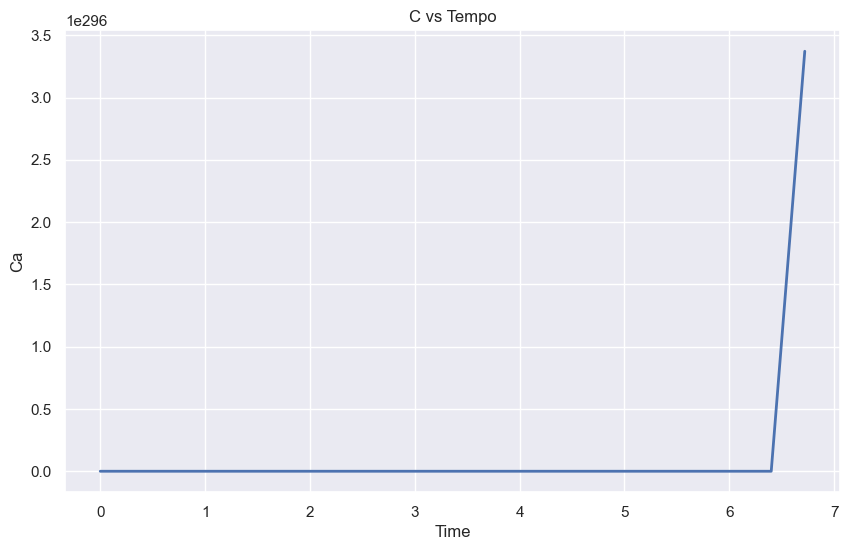

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1, font='sans-serif')



plt.figure(figsize=(10, 6), facecolor="#FFF")
plt.plot(df2['Time'], df2['ca_N-1'], 'b-', linewidth=2)
plt.title('C vs Tempo')
plt.xlabel('Time')
plt.ylabel('Ca')
plt.grid(True)
plt.show()